# IMPORTS

## Libraries

In [16]:
import pylab

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn.tree    import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, average_precision_score


%matplotlib inline
pd.set_option('display.max_columns', 200)

# Load Data

In [17]:
dfTrain = pd.read_feather('../Data/FeatherData/dfTrainGS.feather')
dfTest = pd.read_feather('../Data/FeatherData/dfTestGS.feather')

In [18]:
dfTrain = dfTrain.sort_values('UploadDate')

# Generating some features to evaluate a simple model

In [19]:
dfFeatures = pd.DataFrame(index=dfTrain.index)

In [20]:
dfFeatures['ViewCount'] = dfTrain['ViewCount']
dfFeatures['DaysSincePublication'] = dfTrain['DaysSincePublication']
dfFeatures['WatchList'] = dfTrain['WatchList'].astype(int)
dfFeatures['ViewsPerDay'] = dfFeatures['ViewCount'] / dfFeatures['DaysSincePublication']
dfFeatures = dfFeatures.drop('DaysSincePublication', axis=1)

In [21]:
dfFeatures.head()

,ViewCount,WatchList,ViewsPerDay
1312,38,0,0.015416
453,3,1,0.001343
97,1,0,0.000451
370,303,1,0.137602
272,53,1,0.024190


# Split DataFrame into Training and Validation Dataset

<AxesSubplot:>

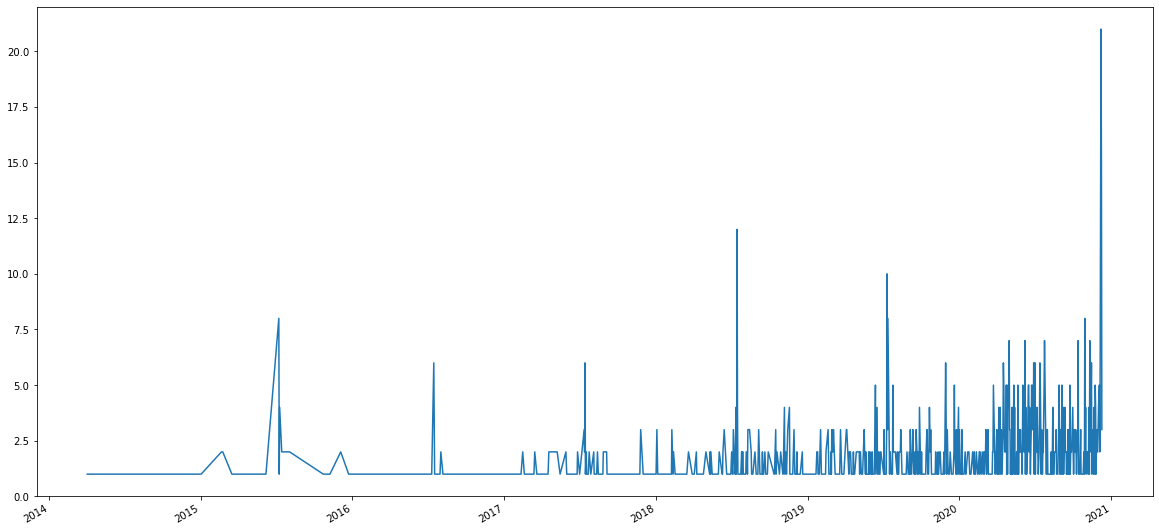

In [22]:
dfTrain['UploadDate'].value_counts().plot(figsize=(20, 10))

In [23]:
dfTrain['UploadDate'].iloc[:int(round(dfTrain.shape[0]/2,0))].max()

Timestamp('2019-12-06 00:00:00')

In [24]:
Xtrain, Xval = dfFeatures.iloc[:int(round(dfTrain.shape[0]/2,0))].drop('WatchList', axis=1), dfFeatures.iloc[int(round(dfTrain.shape[0]/2,0)):].drop('WatchList', axis=1)
ytrain, yval = dfFeatures['WatchList'].iloc[:int(round(dfTrain.shape[0]/2,0))], dfFeatures['WatchList'].iloc[int(round(dfTrain.shape[0]/2,0)):]

In [25]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((736, 2), (737, 2), (736,), (737,))

# Model

## DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight='balanced')
model.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [27]:
p = model.predict_proba(Xval)[:,1]

## Model Evaluate 

In [28]:
average_precision_score(yval,p)

0.14924951410427373

In [29]:
roc_auc_score(yval, p)

0.5614690721649485

## Tree Plot

[Text(446.4, 724.8, 'ViewsPerDay <= 0.571\ngini = 0.5\nsamples = 736\nvalue = [368.0, 368.0]'),
 Text(223.2, 434.88, 'ViewCount <= 300.5\ngini = 0.5\nsamples = 682\nvalue = [337.643, 355.042]'),
 Text(111.6, 144.95999999999992, 'gini = 0.5\nsamples = 654\nvalue = [327.111, 326.535]'),
 Text(334.79999999999995, 144.95999999999992, 'gini = 0.394\nsamples = 28\nvalue = [10.532, 28.507]'),
 Text(669.5999999999999, 434.88, 'ViewCount <= 951.5\ngini = 0.419\nsamples = 54\nvalue = [30.357, 12.958]'),
 Text(558.0, 144.95999999999992, 'gini = 0.38\nsamples = 53\nvalue = [30.357, 10.366]'),
 Text(781.1999999999999, 144.95999999999992, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 2.592]')]

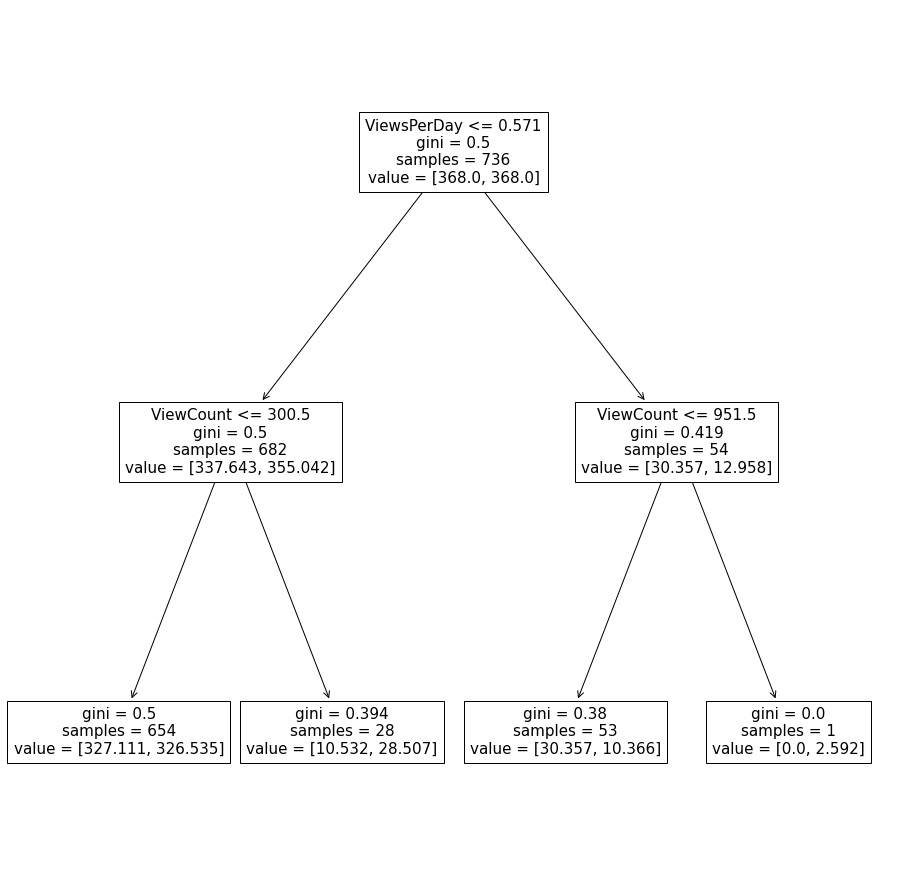

In [30]:
fig, ax = pylab.subplots(1, 1, figsize=(16,16))
plot_tree(model, ax=ax, feature_names=Xtrain.columns)